This file is used to explore the data and potentially clean the data for the project, this file will be rudimentary and is only for POC

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Input Data set - Hotel Bookings

In [2]:
input_data = pd.read_csv('hotel_bookings.csv')

In [7]:
print(input_data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [8]:
print(input_data.head())

          hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          no        342               2015               July   
1  Resort Hotel          no        737               2015               July   
2  Resort Hotel          no          7               2015               July   
3  Resort Hotel          no         13               2015               July   
4  Resort Hotel          no         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1           

In [9]:
print(input_data.describe())

           lead_time  arrival_date_year  arrival_date_week_number  \
count  119390.000000      119390.000000             119390.000000   
mean      104.011416        2016.156554                 27.165173   
std       106.863097           0.707476                 13.605138   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       160.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
std                     8.780829                 0.998613   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%         

In [11]:
print(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

1. Handle Missing Values
We have identifed columns with missing values and decided on suitable imputation strategies. Here’s the plan:

    - children: Impute with the median or mode, as it's a small number of missing values.
    
    - country: Impute with the most frequent value or categorize missing as "Unknown."
    
    - agent and company: Since a significant portion is missing in company, we may drop it or create a category "Unknown" for missing values. The same applies to agent, but with a more tailored approach if required.

2. Standardize Data Formats
Convert reservation_status_date from string to a datetime format.
Ensure categorical columns (like hotel, is_canceled, etc.) have consistent string formatting and are ready for encoding.

3. Detect and Correct Outliers
Detect outliers in numerical columns, especially lead_time, adr (Average Daily Rate), and days_in_waiting_list, using techniques like Z-scores or IQR.

4. Data Standardization
Convert columns like is_canceled from "yes"/"no" strings to binary (1/0).

In [20]:
# Handling missing values

# Impute 'children' column with the median value
input_data['children'].fillna(input_data['children'].median(), inplace=True)

# Impute 'country' column with the most frequent value
input_data['country'].fillna(input_data['country'].mode()[0], inplace=True)

# Explicitly cast 'agent' and 'company' columns to 'object' (string) type
input_data['agent'] = input_data['agent'].astype('object')
input_data['company'] = input_data['company'].astype('object')

# Impute 'agent' and 'company' columns with 'Unknown' to handle missing values
input_data['agent'].fillna('Unknown', inplace=True)
input_data['company'].fillna('Unknown', inplace=True)

# Verify that missing values have been handled
missing_values_summary = input_data.isnull().sum()
missing_values_summary[missing_values_summary > 0]  # Should return an empty series if all NaNs are handled



Series([], dtype: int64)

In [21]:
# Handling missing values

# Impute 'children' column with the median value
input_data['children'].fillna(input_data['children'].median(), inplace=True)

# Impute 'country' column with the most frequent value
input_data['country'].fillna(input_data['country'].mode()[0], inplace=True)

# Explicitly cast 'agent' and 'company' columns to 'object' (string) type
input_data['agent'] = input_data['agent'].astype('object')
input_data['company'] = input_data['company'].astype('object')

# Impute 'agent' and 'company' columns with 'Unknown' to handle missing values
input_data['agent'].fillna('Unknown', inplace=True)
input_data['company'].fillna('Unknown', inplace=True)

# Verify that missing values have been handled
missing_values_summary = input_data.isnull().sum()
missing_values_summary[missing_values_summary > 0]  # Should return an empty series if all NaNs are handled



Series([], dtype: int64)

In [22]:
# Standardize data format by converting 'reservation_status_date' to datetime
input_data['reservation_status_date'] = pd.to_datetime(input_data['reservation_status_date'])

# Convert 'is_canceled' column from 'yes'/'no' to binary (1/0) format
input_data['is_canceled'] = input_data['is_canceled'].apply(lambda x: 1 if x == 'yes' else 0)

# Display a summary of the changes to verify
input_data[['reservation_status_date', 'is_canceled']].head()


,reservation_status_date,is_canceled
0,2015-07-01,0
1,2015-07-01,0
2,2015-07-02,0
3,2015-07-02,0
4,2015-07-03,0


The below code is to explore correlation between numerical features

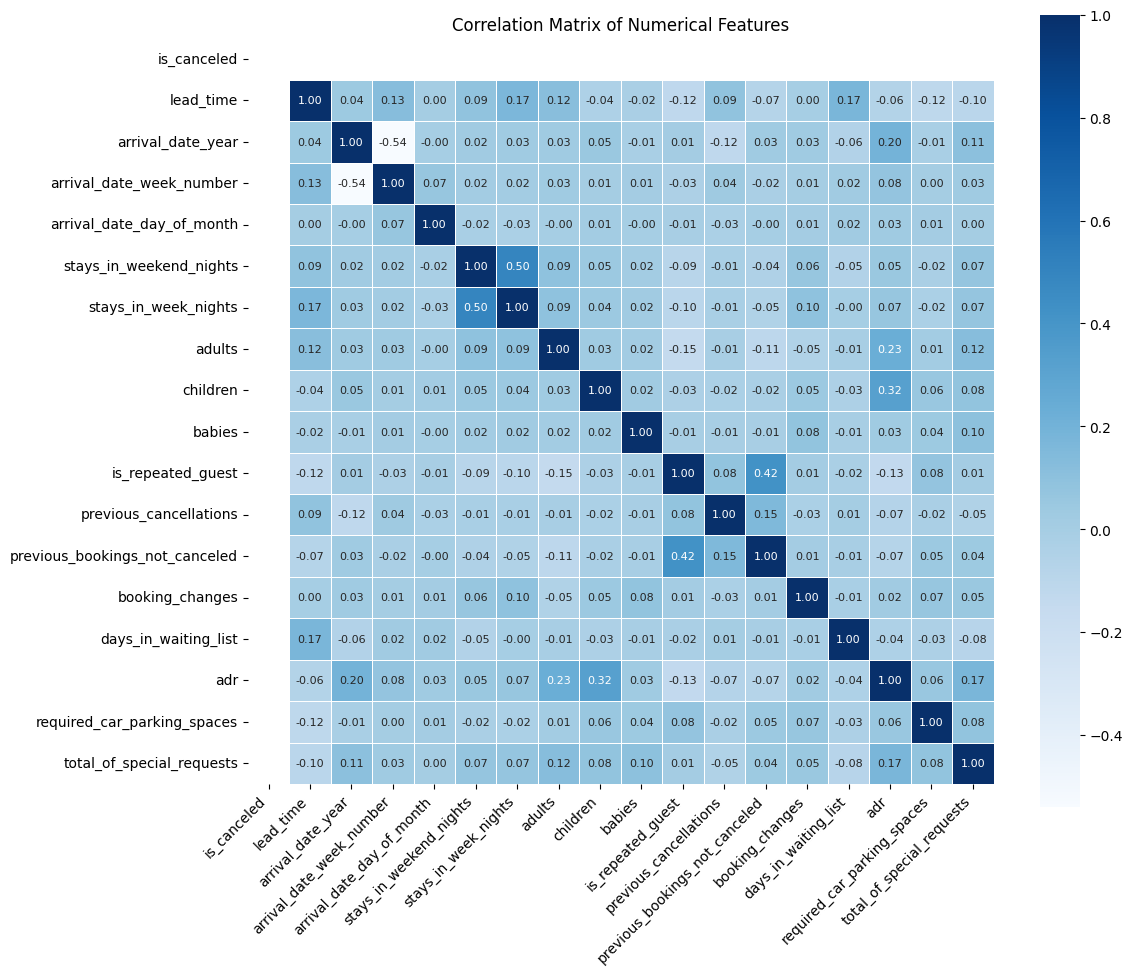

In [23]:

filtered_input = input_data.select_dtypes(include=['int','float'])
correlation_matrix = filtered_input.corr(method='pearson')
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f",
            cbar=True, square=True, linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout() 
plt.show()